# Description

It generates different general plots to compare coefficient values from Pearson, Spearman, Clustermatch and Maximal Information Coefficient (MIC), such as their distribution. This notebook focuses on MIC.

In `Settings` below, the data set and other options (such as tissue for GTEx) are specified.

# Modules

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns

from clustermatch.plots import plot_histogram, plot_cumulative_histogram, jointplot
from clustermatch import conf

# Settings

In [2]:
DATASET_CONFIG = conf.GTEX
GTEX_TISSUE = "whole_blood"
GENE_SEL_STRATEGY = "var_pc_log2"

In [3]:
# this is used for the cumulative histogram
GENE_PAIRS_PERCENT = 0.70

In [4]:
CLUSTERMATCH_LABEL = "CCC"
PEARSON_LABEL = "Pearson"
SPEARMAN_LABEL = "Spearman"
MIC_LABEL = "MIC"

# Paths

In [5]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None and conf.MANUSCRIPT["BASE_DIR"].exists()
), "Manuscript dir not set"

In [6]:
OUTPUT_FIGURE_DIR = (
    conf.MANUSCRIPT["FIGURES_DIR"] / "coefs_comp" / f"gtex_{GTEX_TISSUE}" / "mic"
)
OUTPUT_FIGURE_DIR.mkdir(parents=True, exist_ok=True)
display(OUTPUT_FIGURE_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood/mic')

In [7]:
COMPARISONS_DIR = DATASET_CONFIG["RESULTS_DIR"] / "comparison_others"
display(COMPARISONS_DIR)

PosixPath('/opt/data/results/gtex_v8/comparison_others')

In [8]:
INPUT_FILE = COMPARISONS_DIR / f"gtex_v8_data_{GTEX_TISSUE}-{GENE_SEL_STRATEGY}-all.pkl"
display(INPUT_FILE)

assert INPUT_FILE.exists()

PosixPath('/opt/data/results/gtex_v8/comparison_others/gtex_v8_data_whole_blood-var_pc_log2-all.pkl')

# Data

In [9]:
corrs_df = pd.read_pickle(INPUT_FILE).rename(
    columns={
        "clustermatch": CLUSTERMATCH_LABEL,
        "pearson": PEARSON_LABEL,
        "spearman": SPEARMAN_LABEL,
        "mic": MIC_LABEL,
    }
)

In [10]:
corrs_df.shape

(100000, 5)

In [11]:
corrs_df.head()

CCC   Pearson  Spearman       MIC  \
ENSG00000000419.12 ENSG00000103335.21  0.026871  0.019368  0.001063  0.190166   
                   ENSG00000118515.11  0.044350  0.159679  0.298670  0.202427   
                   ENSG00000119013.8   0.411877  0.731489  0.800159  0.569112   
                   ENSG00000126262.4   0.253667  0.525495  0.649911  0.391753   
                   ENSG00000134686.18  0.184217  0.467763  0.548222  0.319649   

                                      mic_subset  
ENSG00000000419.12 ENSG00000103335.21        all  
                   ENSG00000118515.11        all  
                   ENSG00000119013.8         all  
                   ENSG00000126262.4         all  
                   ENSG00000134686.18        all

## Data stats

In [12]:
corrs_df.describe().applymap(str)

,CCC,Pearson,Spearman,MIC
count,100000.0,100000.0,100000.0,100000.0
mean,0.1407573472700409,0.3054003338769138,0.39461127472960383,0.3002206242462508
std,0.1445228187514837,0.24286207737020646,0.2591538271543309,0.14840760816593887
min,0.0,2.5438786227516275e-06,2.6762936711222096e-07,0.11223625535959839
25%,0.028484755003948113,0.09499704677583418,0.16381764549263292,0.18518310095624893
50%,0.08139034659660288,0.23843562607277313,0.36676860664661387,0.24605328088573442
75%,0.21756498428043292,0.49421120022916165,0.6151301369201667,0.38138246339648574
max,0.7801812505004676,0.9796111936678367,0.970189167999527,0.9111602214105493


In [13]:
# skewness
corrs_df.drop(columns=["mic_subset"]).apply(lambda x: stats.skew(x))

CCC         1.280476
Pearson     0.622770
Spearman    0.243201
MIC         1.163338
dtype: float64

# MIC subset: all gene pairs

In [14]:
# this is supposed to be one of the values of column "mic_subset"
mic_subset = "all"

## Select MIC subset

In [15]:
df = corrs_df[corrs_df["mic_subset"].isin((mic_subset,))].drop(columns=["mic_subset"])

In [16]:
df.shape

(100000, 4)

In [17]:
df.head()

CCC   Pearson  Spearman       MIC
ENSG00000000419.12 ENSG00000103335.21  0.026871  0.019368  0.001063  0.190166
                   ENSG00000118515.11  0.044350  0.159679  0.298670  0.202427
                   ENSG00000119013.8   0.411877  0.731489  0.800159  0.569112
                   ENSG00000126262.4   0.253667  0.525495  0.649911  0.391753
                   ENSG00000134686.18  0.184217  0.467763  0.548222  0.319649

## Histogram plot

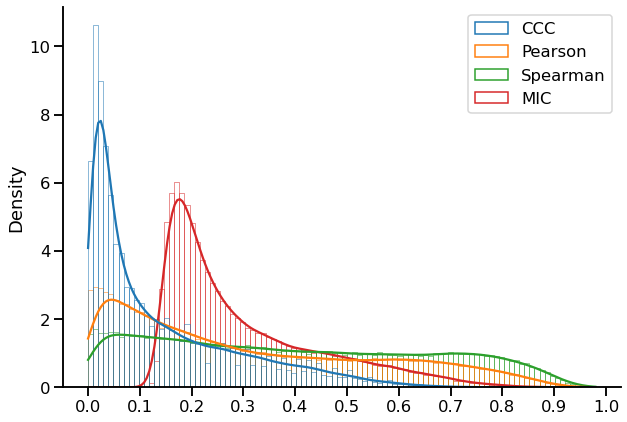

In [18]:
with sns.plotting_context("talk", font_scale=1.0):
    plot_histogram(df, output_dir=OUTPUT_FIGURE_DIR, fill=False)

The distribution of CCC and MIC are very similar

## Cumulative histogram plot

I include also a cumulative histogram without specifying `bins`.

CCC         0.181713
MIC         0.344996
Pearson     0.433716
Spearman    0.563060
Name: 0.7, dtype: float64

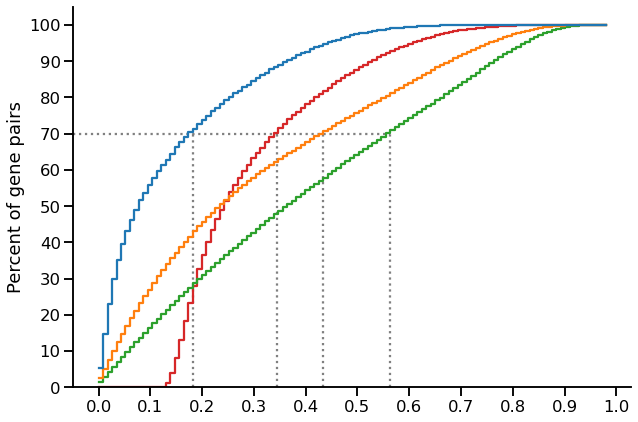

In [19]:
with sns.plotting_context("talk", font_scale=1.0):
    plot_cumulative_histogram(df, GENE_PAIRS_PERCENT, output_dir=OUTPUT_FIGURE_DIR)

## Joint plots comparing each coefficient

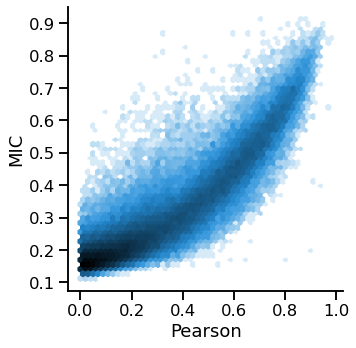

In [20]:
with sns.plotting_context("talk", font_scale=1.0):
    jointplot(
        data=df,
        x=PEARSON_LABEL,
        y=MIC_LABEL,
        add_corr_coefs=False,
        output_dir=OUTPUT_FIGURE_DIR,
    )

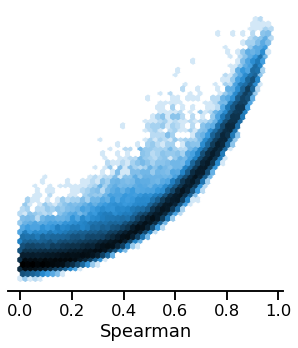

In [21]:
with sns.plotting_context("talk", font_scale=1.0):
    x, y = SPEARMAN_LABEL, MIC_LABEL

    g = jointplot(
        data=df,
        x=x,
        y=y,
        add_corr_coefs=False,
    )

    sns.despine(ax=g.ax_joint, left=True)
    g.ax_joint.set_yticks([])
    g.ax_joint.set_ylabel(None)

    g.savefig(
        OUTPUT_FIGURE_DIR / f"dist-{x.lower()}_vs_{y.lower()}.svg",
        bbox_inches="tight",
        dpi=300,
        facecolor="white",
    )

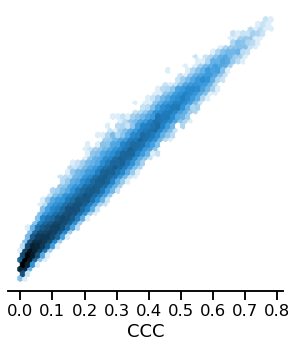

In [22]:
with sns.plotting_context("talk", font_scale=1.0):
    x, y = CLUSTERMATCH_LABEL, MIC_LABEL

    g = jointplot(
        data=df,
        x=x,
        y=y,
        add_corr_coefs=False,
    )

    sns.despine(ax=g.ax_joint, left=True)
    g.ax_joint.set_yticks([])
    g.ax_joint.set_ylabel(None)

    g.savefig(
        OUTPUT_FIGURE_DIR / f"dist-{x.lower()}_vs_{y.lower()}.svg",
        bbox_inches="tight",
        dpi=300,
        facecolor="white",
    )

## Compute correlations

These are the correlation between the correlation values (!). The idea is to see how coefficient match.

In [23]:
df.corr()

,CCC,Pearson,Spearman,MIC
CCC,1.000000,0.879654,0.904655,0.987270
Pearson,0.879654,1.000000,0.932339,0.903975
Spearman,0.904655,0.932339,1.000000,0.915571
MIC,0.987270,0.903975,0.915571,1.000000


In [24]:
df.corr("spearman")

,CCC,Pearson,Spearman,MIC
CCC,1.000000,0.868458,0.943065,0.978154
Pearson,0.868458,1.000000,0.917422,0.877446
Spearman,0.943065,0.917422,1.000000,0.928203
MIC,0.978154,0.877446,0.928203,1.000000


# Create final figure

In [25]:
from svgutils.compose import Figure, SVG, Panel, Text

In [28]:
Figure(
    "643.71cm",
    "427.66cm",
    Panel(
        SVG(OUTPUT_FIGURE_DIR / "dist-histograms.svg").scale(0.5),
        Text("a)", 2, 10, size=9, weight="bold"),
    ),
    Panel(
        SVG(OUTPUT_FIGURE_DIR / "dist-cum_histograms.svg").scale(0.5),
        Text("b)", 2, 10, size=9, weight="bold"),
    ).move(320, 0),
    Panel(
        SVG(OUTPUT_FIGURE_DIR / "dist-pearson_vs_mic.svg").scale(0.595),
        Panel(
            SVG(OUTPUT_FIGURE_DIR / "dist-spearman_vs_mic.svg")
            .scale(0.595)
            .move(215, 0)
        ),
        Panel(SVG(OUTPUT_FIGURE_DIR / "dist-ccc_vs_mic.svg").scale(0.595).move(460, 0)),
        Text("c)", 2, 10, size=9, weight="bold"),
    ).move(0, 220),
).save(OUTPUT_FIGURE_DIR / "dist-main.svg")

Now open `dist-main.svg`, reside to fit drawing to page, and add a white rectangle to the background.